In [ ]:
#data manipulators
import pandas as pd
import numpy as np

#data viz
import matplotlib.pyplot as plt
import seaborn as sns

#data preparation
from sklearn.model_selection import train_test_split

# ML Algorithms
from sklearn.linear_model import LinearRegression

#Metric

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv ("ABC Case Study tshirt_sales.csv.csv")
scenario = pd.read_csv ("CS1_Scenario.csv")
scenario.head()

In [ ]:
df.shape

In [109]:
df.isna().sum()

Year            0
Month           0
units_sold      0
dollar_price    0
advertisment    0
promotions      0
dtype: int64

In [110]:
df.head(3)

,Year,Month,units_sold,dollar_price,advertisment,promotions
0,2019,1,73959,8.75,50.04,61.13
1,2019,2,71544,8.99,50.74,60.19
2,2019,3,78587,7.50,50.14,59.16


In [111]:
key_columns = ["units_sold", "dollar_price", "advertisment", "promotions"]

In [112]:
df[key_columns].describe()

,units_sold,dollar_price,advertisment,promotions
count,24.000000,24.000000,24.000000,24.000000
mean,74258.291667,8.131667,50.153333,59.875833
std,3164.394612,0.506666,1.279119,0.682215
min,69003.000000,7.250000,48.000000,58.000000
25%,71959.500000,7.900000,49.405000,59.635000
50%,74103.000000,8.150000,50.120000,59.895000
75%,76354.500000,8.425000,50.772500,60.237500
max,80364.000000,8.990000,54.000000,61.130000


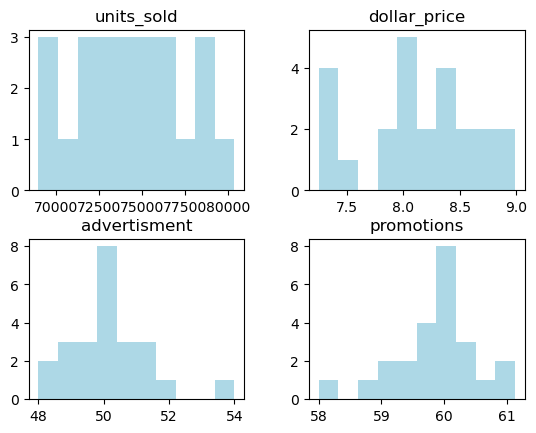

In [113]:
df[key_columns].hist(grid = False, color = "lightblue");

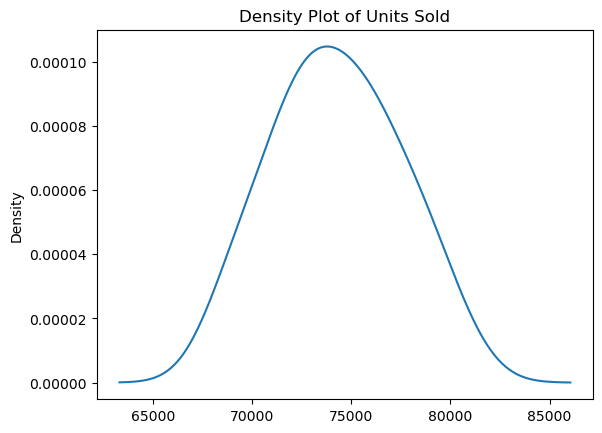

In [114]:
df['units_sold'].plot.kde(title = 'Density Plot of Units Sold');

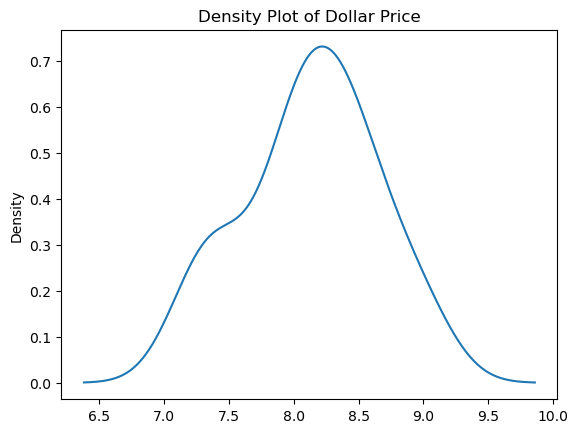

In [115]:
df['dollar_price'].plot.kde(title = "Density Plot of Dollar Price");

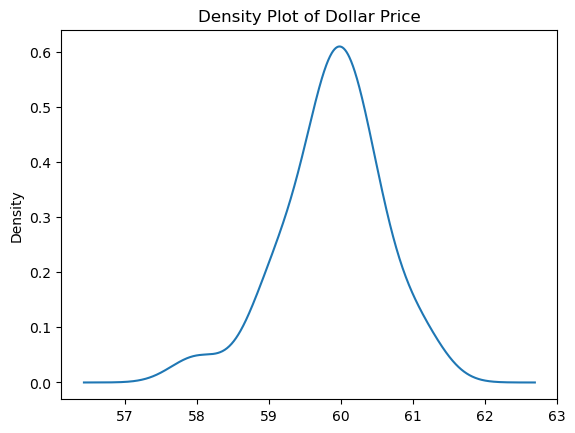

In [116]:
df['promotions'].plot.kde(title = "Density Plot of Dollar Price");

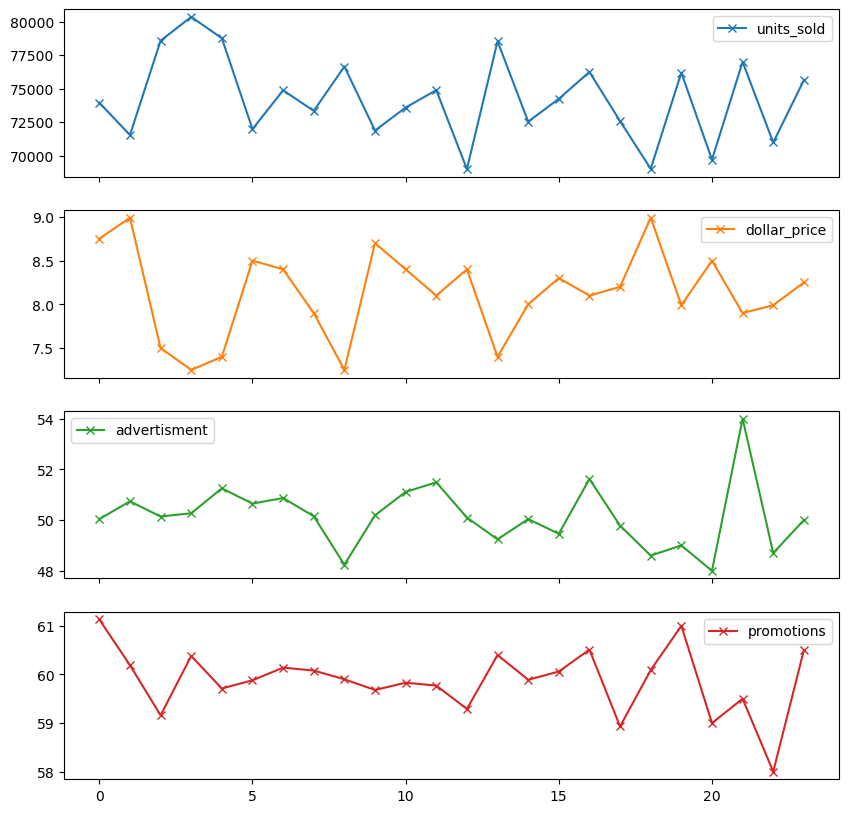

In [117]:
df[key_columns].plot.line(figsize = (10, 10), subplots = True, marker = 'x');

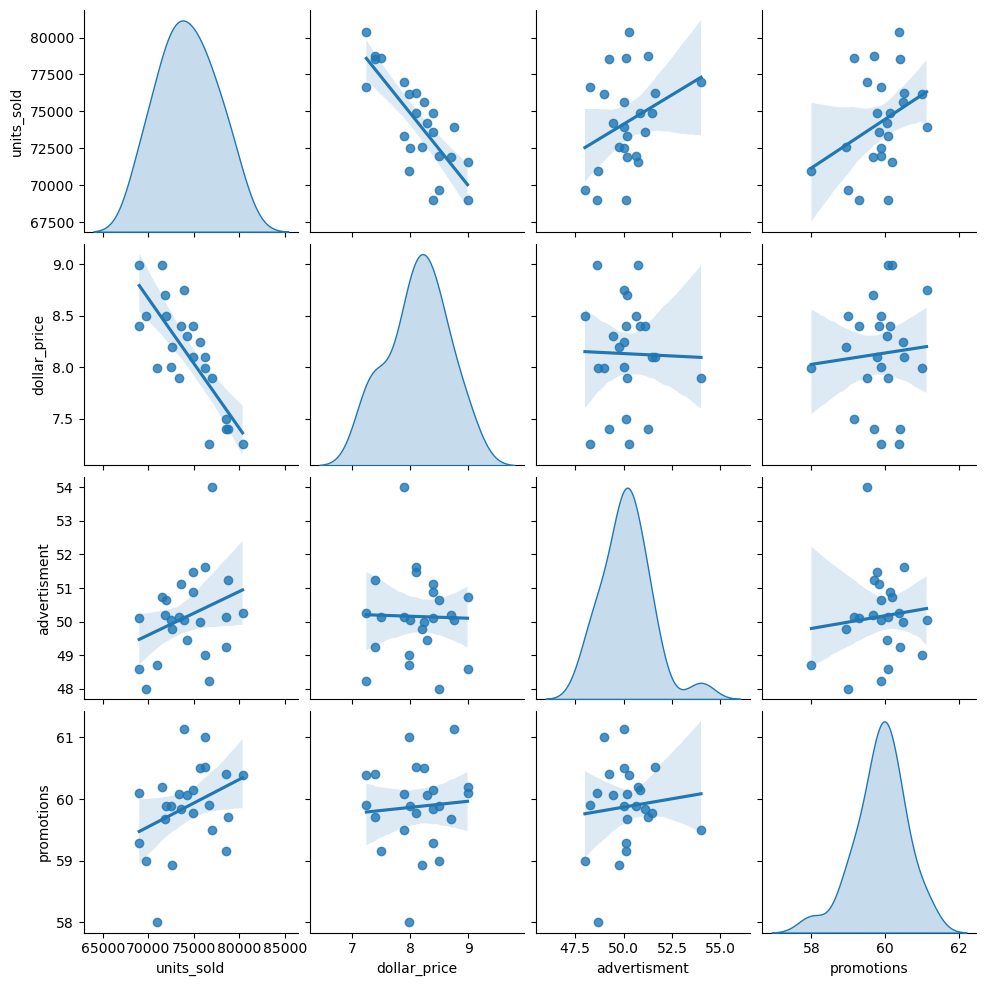

In [118]:
sns.pairplot(df[key_columns], diag_kind = 'kde', kind = 'reg');

In [1]:
corr = df[key_columns].corr().round(3)
sns.heatmap(corr, annot = True)

NameError: name 'df' is not defined

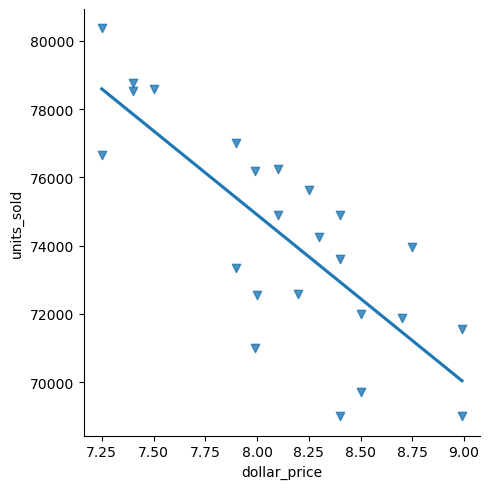

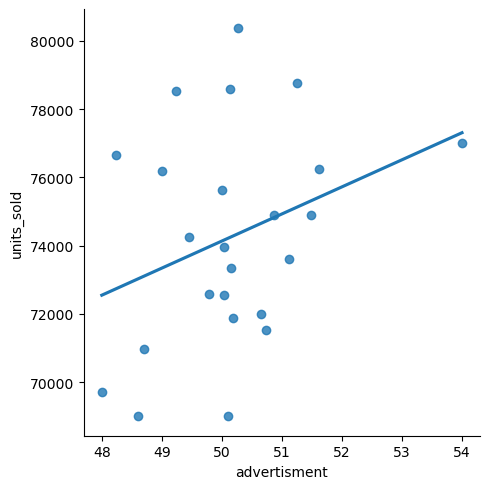

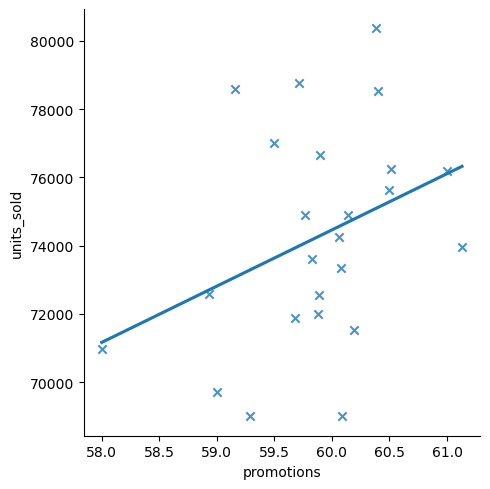

In [120]:
# To visualise the linear relationship

sns.lmplot(x = 'dollar_price', y = 'units_sold', data = df, order = 1, markers = ['v'], ci = False)
sns.lmplot(x = 'advertisment', y = 'units_sold', data = df, order = 1, markers = ['o'], ci = False)
sns.lmplot(x = 'promotions', y = 'units_sold', data = df, order = 1, markers = ['x'], ci = False)

<AxesSubplot:title={'center':'Plot of Units Sold'}>

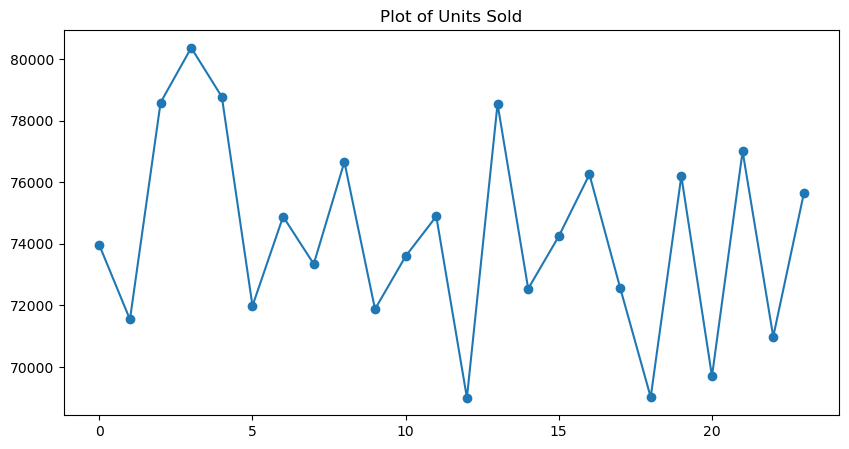

In [121]:
# 
df['units_sold'].plot.line(figsize= (10, 5), title = 'Plot of Units Sold', marker = 'o')

In [124]:
#data preparation
from sklearn.model_selection import train_test_split

In [125]:
#Splitting the data
x = df[key_columns].drop(columns = "units_sold")
y = df["units_sold"]



In [126]:
#Performing train test split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.1, random_state = 2)


In [127]:
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

print("\n")

print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

display(x_train.head())
display(y_train.head())

x_train: (21, 3)
x_test: (3, 3)


y_train: (21,)
y_test: (3,)


,dollar_price,advertisment,promotions
6,8.40,50.87,60.14
14,8.00,50.04,59.89
16,8.10,51.62,60.51
3,7.25,50.27,60.38
12,8.40,50.10,59.29


6     74885
14    72543
16    76253
3     80364
12    69003
Name: units_sold, dtype: int64

In [128]:
#Model Building
from sklearn.linear_model import LinearRegression


In [129]:
y.mean()

74258.29166666667

In [130]:
(1229/74258)*100

1.6550405343532009

In [131]:
#Call the model
model = LinearRegression()

#Fit the model
model.fit(x_train, y_train)

# # calculate the score
print("R^2: {:.2f}".format(model.score(x_train, y_train)))

#Predicting for the train data

#define prediction data as train_prediction

train_predictions = np.round(model.predict(x_train),1)

# accuracy metrics
print("RMSE: {:.2f}".format(mean_squared_error(y_train, train_predictions, squared = False)))
print("MAE: {:.2f}".format(mean_absolute_error(y_train, train_predictions))) # the 2f means that its is for 2 decimal
print(train_predictions)

R^2: 0.85
RMSE: 1229.57
MAE: 920.10
[73830.6 74853.2 76558.4 79728.1 71796.3 70996.8 78499.6 73464.9 72705.3
 71967.6 70789.7 76227.2 75777.3 69260.9 76083.5 69069.9 75177.7 74599.4
 78247.5 73187.1 77427. ]


In [132]:
#Combine actual and prediction values

output = pd.DataFrame({"actual": y_train, "train_predictions": train_predictions})

#sort the index

output = output.sort_index()

#New output

output.head()

,actual,train_predictions
1,71544,70789.7
2,78587,76227.2
3,80364,79728.1
4,78771,78499.6
5,71986,72705.3


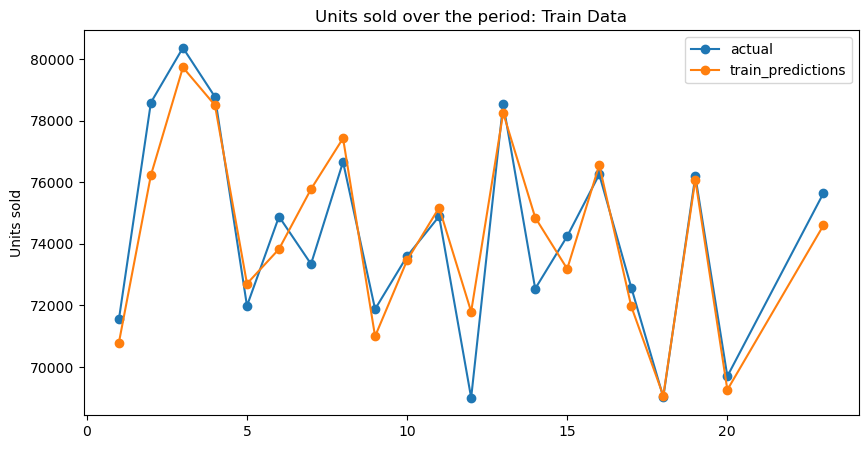

In [133]:
# add prediction back to the data and visualise

#plot size
plt.figure(figsize = (10,5))

# line chart
plt.plot(output["actual"], marker = "o", label = "actual")
plt.plot(output["train_predictions"], marker = "o", label = "train_predictions")

# labels
plt.ylabel("Units sold")
plt.title("Units sold over the period: Train Data")

# show labels
plt.legend()

# show
plt.show();

In [134]:
#Predicting for test data

test_predictions = np.round(model.predict(x_test), 1)

# calculate the score
print("R^2 of test: {:.2f}".format(model.score(x_test, y_test)))


# accuracy metrics
print("RMSE of test: {:.2f}".format(mean_squared_error(y_test, test_predictions, squared = False)))
print("MAE of test: {:.2f}".format(mean_absolute_error(y_test, test_predictions))) # the 2f means that its is for 2 decimal
print(test_predictions)

R^2 of test: 0.94
RMSE of test: 594.52
MAE of test: 562.63
[77549.8 73152.7 70650.2]


In [135]:
#Combine actual and prediction values

test_output = pd.DataFrame({"actual": y_test, "test_predictions": test_predictions})

#sort the index

test_output = test_output.sort_index()

#New output

test_output.head()

,actual,test_predictions
0,73959,73152.7
21,77005,77549.8
22,70987,70650.2


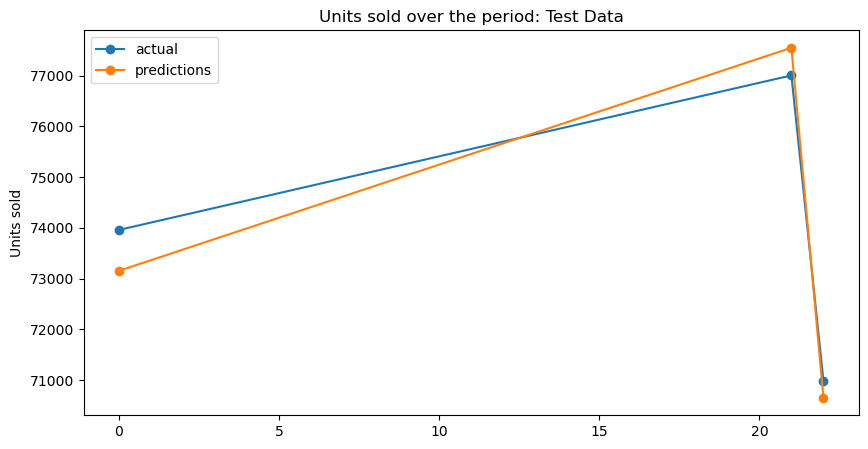

In [136]:
# add prediction back to the data and visualise

# plot size
plt.figure(figsize = (10,5))

# line chart
plt.plot(test_output["actual"], marker = "o", label = "actual")
plt.plot(test_output["test_predictions"], marker = "o", label = "predictions")

# labels
plt.ylabel("Units sold")
plt.title("Units sold over the period: Test Data")

# show labels
plt.legend()

# show
plt.show();

In [137]:
# printing the results after rounding off
print("The intercept is:", np.round(model.intercept_,1))
print("The co-efficients are:", np.round(model.coef_,1))

The intercept is: -24295.2
The co-efficients are: [-5142.2   722.4  1738.8]


,Coefficient
dollar_price,-5142.2
advertisment,722.4
promotions,1738.8


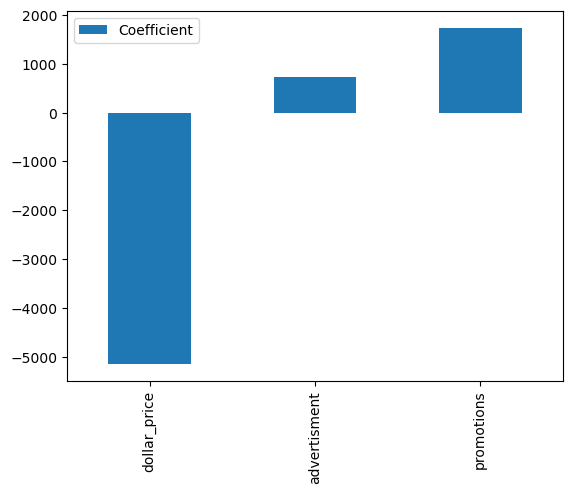

In [138]:
coeffs = pd.DataFrame(np.round(model.coef_,1), x_train.columns, columns = ["Coefficient"])
display(coeffs)
coeffs.plot(kind = "bar");

In [148]:
scenario 
scenario[['dollar_price', 'advertisment','promotions']]

,dollar_price,advertisment,promotions
0,10,50,61
1,8,45,55
2,6,40,50
3,10,40,50


In [149]:
# making the predictions
projections = np.round(model.predict(scenario[['dollar_price', 'advertisment','promotions']]),0)
projections

array([66470., 62710., 60688., 40119.])

In [154]:
# adding the predictions to the data 
scenario["projections"] = projections

scenario.style.set_properties(**{'background-color': 'darkred',
                                   'color': 'white',
                                   'border-color': 'white'}, subset= ['projections'])

,business_context,scenario,dollar_price,advertisment,promotions,projections
0,High price; high marketing,Scenario 1,10,50,61,66470.000000
1,Medium price; medium marketing,Scenario 2,8,45,55,62710.000000
2,Low price; low marketing,Scenario 3,6,40,50,60688.000000
3,High price; low marketing,Scenario 4,10,40,50,40119.000000


In [155]:
# Filter out the final scenario
scenario[scenario["projections"] == scenario["projections"].max()]

,business_context,scenario,dollar_price,advertisment,promotions,projections
0,High price; high marketing,Scenario 1,10,50,61,66470.0
